In [1]:
import tensorboard
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
import cv2 as cv

import sklearn 
from sklearn.model_selection import train_test_split

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
%matplotlib inline

2023-09-11 18:10:20.828503: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 18:10:21.016381: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 18:10:21.018446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 18:10:24.706107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
x_train[0].shape

(28, 28)

In [4]:
# x_train = x_train.reshape(60000,784)
# x_test = x_test.reshape(10000,784)

In [13]:
#data scaling convert the values between 0 to 1 instead of 0 to 255 

x_train = x_train/255 
x_test = x_test/255 


In [14]:
# categorical encoding 
num_classes = 10 

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add (Dense(512, activation = "relu"))
model.add (Dense(512, activation = "relu"))
model.add (Dense(num_classes, activation = "softmax"))  

          

In [16]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [18]:
results = model.fit(x_train,y_train,epochs=10,validation_split=0.2,callbacks=tb_callback)

2023-09-11 18:11:27.511109: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
 119/1500 [=>............................] - ETA: 26s - loss: 0.5745 - accuracy: 0.8288

KeyboardInterrupt: 

In [12]:
#model.save("MNIST_1")

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
#model.load_weights("MNIST")

In [105]:
y_prob  = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [106]:
y_pred = y_prob.argmax(axis=1) 

y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [36]:
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix

In [38]:
accuracy = accuracy_score(y_pred,np.argmax(y_test,axis=1))
accuracy

0.9777

In [39]:
confusion_matrix = multilabel_confusion_matrix(y_pred,np.argmax(y_test,axis=1))

In [21]:
confusion_matrix

array([[[9011,    8],
        [   9,  972]],

       [[8858,   16],
        [   7, 1119]],

       [[8947,   16],
        [  21, 1016]],

       [[8955,   17],
        [  35,  993]],

       [[8984,   11],
        [  34,  971]],

       [[9105,   50],
        [   3,  842]],

       [[9019,   13],
        [  23,  945]],

       [[8941,   22],
        [  31, 1006]],

       [[8974,   16],
        [  52,  958]],

       [[8983,   54],
        [   8,  955]]])

In [22]:
res = model.predict(x_test)

 32/313 [==>...........................] - ETA: 1s

313/313 [==============================] - 2s 6ms/step


In [40]:
res

array([[2.66597334e-11, 6.95238889e-09, 4.26990653e-07, ...,
        9.99991596e-01, 1.74106947e-06, 1.86245893e-06],
       [5.84088638e-27, 1.33044906e-19, 9.99999940e-01, ...,
        2.55896421e-21, 1.95574593e-24, 0.00000000e+00],
       [4.73128864e-18, 9.99999940e-01, 1.71081222e-11, ...,
        3.60928355e-13, 3.00534641e-12, 1.61701218e-21],
       ...,
       [1.87277254e-27, 1.01031945e-20, 5.61498761e-18, ...,
        3.89860487e-22, 4.92258028e-17, 3.58304863e-16],
       [5.05864565e-20, 1.63107317e-31, 7.40949034e-30, ...,
        5.21945853e-29, 4.05163831e-13, 1.08947903e-25],
       [1.70981779e-18, 1.09707888e-23, 8.98044114e-23, ...,
        1.34710834e-26, 1.83134897e-15, 1.08606102e-23]], dtype=float32)

In [74]:
img = cv.imread("download.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

In [49]:
img.shape

(225, 225, 3)

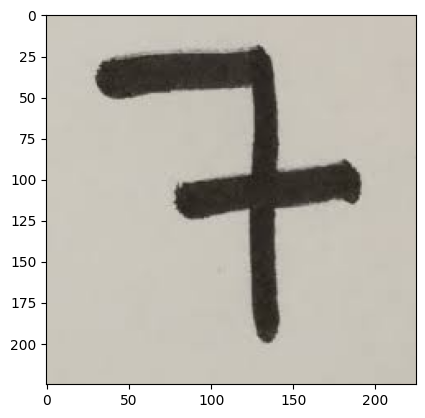

In [50]:
plt.imshow(img)

In [93]:
img = cv.resize(img,(28,28))

In [100]:
img = img.flatten()

In [101]:
img.shape

(784,)

In [102]:
model.predict(img)

ValueError: in user code:

    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=uint8)
      • training=False
      • mask=None


ValueError: in user code:

    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/xcal/anaconda3/envs/Sign/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 3)
